In [1]:
import tensorflow as tf
tf.__version__

'2.0.0-alpha0'

In [2]:
pip install tensorflow==2.0.0-alpha0

     |████████████████████████████████| 79.9MB 1.2MB/s 
     |████████████████████████████████| 419kB 51.3MB/s 
     |████████████████████████████████| 3.0MB 45.6MB/s 
  Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0


In [2]:
! git clone https://github.com/nicholasjhana/short-term-energy-demand-forecasting.git

Cloning into 'short-term-energy-demand-forecasting'...
remote: Enumerating objects: 174, done.
remote: Counting objects: 100% (174/174), done.
remote: Compressing objects: 100% (129/129), done.
remote: Total 174 (delta 87), reused 123 (delta 44), pack-reused 0
Receiving objects: 100% (174/174), 8.25 MiB | 5.09 MiB/s, done.
Resolving deltas: 100% (87/87), done.


In [4]:
!ls -l short-term-energy-demand-forecasting/data/processed/transformed_2016_2018.csv

total 1452
-rw-r--r-- 1 root root   34805 Aug 31 12:35 holidays_data_daily.csv
-rw-r--r-- 1 root root 1445925 Aug 31 12:35 transformed_2016_2018.csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
data = pd.read_csv('short-term-energy-demand-forecasting/data/processed/energy_min_features.csv', parse_dates=True, index_col='date')

In [4]:
data.head()

,t-0 h_0,t-0 h_1,t-0 h_2,t-0 h_3,t-0 h_4,t-0 h_5,t-0 h_6,t-0 h_7,t-0 h_8,t-0 h_9,t-0 h_10,t-0 h_11,t-0 h_12,t-0 h_13,t-0 h_14,t-0 h_15,t-0 h_16,t-0 h_17,t-0 h_18,t-0 h_19,t-0 h_20,t-0 h_21,t-0 h_22,t-0 h_23,t-1 h_0,t-1 h_1,t-1 h_2,t-1 h_3,t-1 h_4,t-1 h_5,t-1 h_6,t-1 h_7,t-1 h_8,t-1 h_9,t-1 h_10,t-1 h_11,t-1 h_12,t-1 h_13,t-1 h_14,t-1 h_15,...,t-3 h_8,t-3 h_9,t-3 h_10,t-3 h_11,t-3 h_12,t-3 h_13,t-3 h_14,t-3 h_15,t-3 h_16,t-3 h_17,t-3 h_18,t-3 h_19,t-3 h_20,t-3 h_21,t-3 h_22,t-3 h_23,t-4 h_0,t-4 h_1,t-4 h_2,t-4 h_3,t-4 h_4,t-4 h_5,t-4 h_6,t-4 h_7,t-4 h_8,t-4 h_9,t-4 h_10,t-4 h_11,t-4 h_12,t-4 h_13,t-4 h_14,t-4 h_15,t-4 h_16,t-4 h_17,t-4 h_18,t-4 h_19,t-4 h_20,t-4 h_21,t-4 h_22,t-4 h_23
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-05,23642.0,21990.0,20629.0,19865.0,19446.0,19248.0,19296.0,18956.0,20072.0,21911.0,23473.0,23991.0,23961.0,23883.0,23378.0,22190.0,21549.0,21233.0,21298.0,21756.0,22929.0,25815.0,25843.0,24167.0,26751.0,24882.0,23736.0,23199.0,23000.0,23348.0,25748.0,29620.0,31776.0,33087.0,33719.0,33669.0,33521.0,32874.0,31594.0,30376.0,...,33164.0,34001.0,34176.0,33919.0,33593.0,33310.0,32099.0,31449.0,31179.0,31175.0,32515.0,34967.0,35381.0,34700.0,32055.0,28939.0,22431.0,21632.0,20357.0,19152.0,18310.0,18054.0,18234.0,18596.0,18541.0,18942.0,20484.0,21805.0,22607.0,23178.0,23265.0,22061.0,21481.0,21830.0,24291.0,25234.0,25881.0,26149.0,25610.0,24000.0
2016-01-06,25135.0,23717.0,22747.0,22440.0,22396.0,22737.0,24350.0,26788.0,28705.0,30029.0,30655.0,31057.0,31466.0,31369.0,30470.0,29970.0,29979.0,29924.0,29640.0,29409.0,29484.0,30027.0,29332.0,26854.0,23642.0,21990.0,20629.0,19865.0,19446.0,19248.0,19296.0,18956.0,20072.0,21911.0,23473.0,23991.0,23961.0,23883.0,23378.0,22190.0,...,34093.0,35371.0,35678.0,35221.0,34751.0,34335.0,33029.0,32344.0,31927.0,31824.0,32226.0,35161.0,36599.0,35729.0,33154.0,29838.0,24937.0,23121.0,22101.0,21718.0,21760.0,22695.0,25689.0,30493.0,33164.0,34001.0,34176.0,33919.0,33593.0,33310.0,32099.0,31449.0,31179.0,31175.0,32515.0,34967.0,35381.0,34700.0,32055.0,28939.0
2016-01-07,28425.0,26609.0,25442.0,24864.0,24609.0,24776.0,26062.0,28023.0,30354.0,32641.0,33925.0,34542.0,35364.0,35804.0,34702.0,33939.0,33753.0,33510.0,33079.0,32697.0,32172.0,31560.0,30943.0,29025.0,25135.0,23717.0,22747.0,22440.0,22396.0,22737.0,24350.0,26788.0,28705.0,30029.0,30655.0,31057.0,31466.0,31369.0,30470.0,29970.0,...,31776.0,33087.0,33719.0,33669.0,33521.0,32874.0,31594.0,30376.0,29915.0,29633.0,29158.0,29159.0,30469.0,32482.0,30508.0,28598.0,27227.0,25292.0,24265.0,23774.0,23650.0,24275.0,27243.0,31518.0,34093.0,35371.0,35678.0,35221.0,34751.0,34335.0,33029.0,32344.0,31927.0,31824.0,32226.0,35161.0,36599.0,35729.0,33154.0,29838.0
2016-01-08,26986.0,25125.0,23969.0,23281.0,23088.0,23573.0,25487.0,27299.0,29776.0,31487.0,33239.0,34169.0,35215.0,35892.0,35288.0,34479.0,34240.0,34101.0,33693.0,32919.0,32267.0,32709.0,32355.0,29998.0,28425.0,26609.0,25442.0,24864.0,24609.0,24776.0,26062.0,28023.0,30354.0,32641.0,33925.0,34542.0,35364.0,35804.0,34702.0,33939.0,...,20072.0,21911.0,23473.0,23991.0,23961.0,23883.0,23378.0,22190.0,21549.0,21233.0,21298.0,21756.0,22929.0,25815.0,25843.0,24167.0,26751.0,24882.0,23736.0,23199.0,23000.0,23348.0,25748.0,29620.0,31776.0,33087.0,33719.0,33669.0,33521.0,32874.0,31594.0,30376.0,29915.0,29633.0,29158.0,29159.0,30469.0,32482.0,30508.0,28598.0
2016-01-09,28284.0,26487.0,25264.0,24744.0,24505.0,24766.0,26459.0,28734.0,30505.0,32582.0,34111.0,35067.0,36201.0,36769.0,36004.0,35417.0,35492.0,35529.0,34992.0,34052.0,33899.0,34957.0,32547.0,30096.0,26986.0,25125.0,23969.0,23281.0,23088.0,23573.0,25487.0,27299.0,29776.0,31487.0,33239.0,34169.0,35215.0,35892.0,35288.0,34479.0,...,28705.0,30029.0,30655.0,31057.0,31466.0,31369.0,30470.0,29970.0,29979.0,29924.0,29640.0,29409.0,29484.0,30027.0,29332.0,26854.0,23642.0,21990.0,20629.0,19865.0,19446.0,19248.0,19296.0,18956.0,20072.0,21911.0,23473.0,23991.0,23961.0,23883.0,23378.0,22190.0,21549.0,21

In [0]:
### extract only hour 0 and work with a single hourly slice
X_h0, Y_h0 = np.array(data[['t-1 h_0', 't-2 h_0', 't-3 h_0']]), np.array(data['t-0 h_0'])

In [6]:
X_h0

array([[26751., 27227., 24937.],
       [23642., 26751., 27227.],
       [25135., 23642., 26751.],
       ...,
       [25147., 24679., 22138.],
       [25709., 25147., 24679.],
       [24922., 25709., 25147.]])

In [7]:
Y_h0

array([23642., 25135., 28425., ..., 25709., 24922., 24312.])

In [12]:
X_h0.shape

(1092, 3)

# Univariate

X is 3 lag terms used to predict Y

X t-1, t-2, t-3

Y = t

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
#split the test and train
split = int(X_h0.shape[0] * 0.8)
X_train_h0, X_test_h0 = X_h0[:split, :], X_h0[split:, :]
Y_train_h0, Y_test_h0 = Y_h0[:split], Y_h0[:split]

In [141]:
scaler_x, scaler_y, scaler_x_test= MinMaxScaler(), MinMaxScaler(), MinMaxScaler()
scaler_x.fit(X_train_h0)
scaler_y.fit(np.reshape(Y_train_h0, (-1,1)))
scaler_x_test.fit(X_test_h0)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
X_train_h0_f = scaler_x.transform(X_train_h0)
Y_train_h0_f = scaler_y.transform(np.reshape(Y_train_h0, (-1,1)))
X_test_h0_f = scaler_x_test.transform(X_test_h0)

In [86]:
X_train_h0_f

array([[ 0.20970123,  0.4686146 , -0.78047722],
       [-1.48726376,  0.20882352,  0.46899858],
       [-0.6723494 , -1.48800519,  0.20928221],
       ...,
       [-0.47530715, -0.79486513, -1.6867564 ],
       [-0.32738901, -0.47612985, -0.79411779],
       [-0.28208567, -0.32822359, -0.47547418]])

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import mean_absolute_error

In [0]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=3)) 
model.add(Dense(1))

In [0]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-8 * 10**(epoch/10))

optimizer = optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4)

In [0]:
model.compile(optimizer=optimizer, loss='mae')

In [138]:
history = model.fit(X_train_h0_f, Y_train_h0_f, epochs = 1000)#, callbacks=[lr_schedule])

Epoch 1/1000
873/873 [==============================] - 0s 100us/sample - loss: 15.4966
Epoch 2/1000
873/873 [==============================] - 0s 31us/sample - loss: 15.4826
Epoch 3/1000
873/873 [==============================] - 0s 29us/sample - loss: 15.4686
Epoch 4/1000
873/873 [==============================] - 0s 33us/sample - loss: 15.4546
Epoch 5/1000
873/873 [==============================] - 0s 30us/sample - loss: 15.4406
Epoch 6/1000
873/873 [==============================] - 0s 31us/sample - loss: 15.4266
Epoch 7/1000
873/873 [==============================] - 0s 31us/sample - loss: 15.4126
Epoch 8/1000
873/873 [==============================] - 0s 28us/sample - loss: 15.3986
Epoch 9/1000
873/873 [==============================] - 0s 35us/sample - loss: 15.3846
Epoch 10/1000
873/873 [==============================] - 0s 37us/sample - loss: 15.3707
Epoch 11/1000
873/873 [==============================] - 0s 29us/sample - loss: 15.3567
Epoch 12/1000
873/873 [=================

In [148]:
Y_hat_h0_f = model.predict(X_test_h0_f)
Y_hat_h0_f[:5]

array([[1.9739058],
       [1.9739058],
       [1.9739058],
       [1.9739058],
       [1.9739058]], dtype=float32)

In [0]:
Y_hat_h0 = scaler_y.inverse_transform(Y_hat_h0_f)

In [149]:
Y_test_h0[:5]

array([23642., 25135., 28425., 26986., 28284.])

In [150]:
Y_hat_h0[:5]

array([[41287.46],
       [41287.46],
       [41287.46],
       [41287.46],
       [41287.46]], dtype=float32)

In [0]:
def plot_loss(history):
  fig = plt.figure(figsize=(8,7))
  lrs = 1e-8 *(10**(np.arange(100)/20))
  plt.semilogx(lrs, history.history['loss'])
  plt.show()

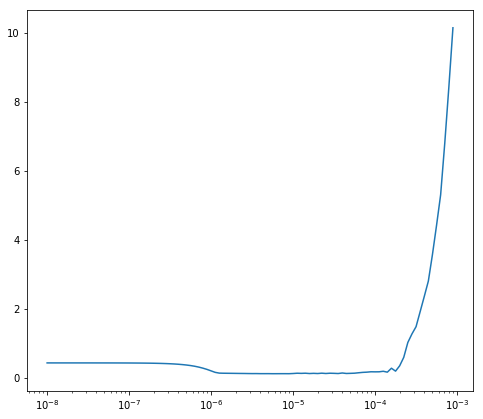

In [130]:
plot_loss(history)

# Multivariate

X is 
- 3 lag terms
- 3 lag weather terms

X 
- et-1 et-2 et-3
- wt-1 wt-2 wt-3

Y
- t


Constructing the X vector for input into a MLP

Must input as the form:
- et-1, wt-1, et-2, wt-2, et-3, wt-3

To do this:
1. For each feature take each row and reshape to (num_lags, 1)
2. Append each reshaped row to a list. One list per feature.
3. Concatenate the arrays together. Shape should be (number_samples, num_lags, num_features)
4. Reshape to the form (number_samples, num_lags * num_features

In [8]:
!ls -l short-term-energy-demand-forecasting/data/weather_2013_2019.csv

total 77316
drwxr-xr-x 2 root root     4096 Aug 31 18:21 cleaned_data
drwxr-xr-x 2 root root     4096 Aug 31 18:21 processed
drwxr-xr-x 2 root root     4096 Aug 31 18:21 raw_data_ES
-rw-r--r-- 1 root root 39576929 Aug 31 18:21 weather_2013_2019.csv
-rw-r--r-- 1 root root 39576929 Aug 31 18:21 weeather_2013_2019.csv


In [0]:
weather = pd.read_csv('short-term-energy-demand-forecasting/data/weather_2013_2019.csv', parse_dates=True, index_col='dt')

In [13]:
weather.head(2)

,Unnamed: 0,dt_iso,city_id,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
dt,,,,,,,,,,,,,,,,,,,
2013-10-01 02:00:00,0,2013-10-01 00:00:00 +0000 UTC,2509954,Valencia,299.15,299.15,299.15,1008,61,5,290,0.0,0.0,0.0,20,801,clouds,few clouds,02n
2013-10-01 03:00:00,1,2013-10-01 01:00:00 +0000 UTC,2509954,Valencia,298.15,298.15,298.15,1009,65,4,250,0.0,0.0,0.0,20,801,clouds,few clouds,02n


In [0]:
weather_group = weather[['temp']].groupby(weather.index).mean()

In [24]:
weather_group.shape

(51714, 1)

In [0]:
weather_transformed = transform_to_windows(weather_group, load_type='temp')

In [44]:
data.index.min(), data.index.max()

(Timestamp('2016-01-05 00:00:00'), Timestamp('2018-12-31 00:00:00'))

In [0]:
data.head()

In [58]:
weather_features.shape

(1092, 120)

In [0]:
### extract only hour 0 and work with a single hourly slice
X_h0, Y_h0 = np.array(data[['t-1 h_0', 't-2 h_0', 't-3 h_0']]), np.array(data['t-0 h_0'])

In [0]:
weather_features = weather_features['2016-01-05':'2018-12-31']

In [0]:
shifts_list = [1, 2, 3, 4]

#weather_features = make_shifted_features(weather_transformed, shifts_list)

### extract only hour 0 and work with a single hourly slice
X_w_h0 = np.array(weather_features[['t-1 h_0', 't-2 h_0', 't-3 h_0']])

In [154]:
X_h0.shape, X_w_h0.shape

((1092, 3), (1092, 3))

In [0]:
e_samples, w_samples = list(), list()

for row in X_h0:
  E = np.reshape(row, (3,1))
  e_samples.append(E)

for r in X_w_h0:
  W = np.reshape(r, (3,1))
  w_samples.append(W)

X_e_w_h0 = np.concatenate([e_samples, w_samples], axis=2)

In [156]:
X_e_w_h0.shape

(1092, 3, 2)

In [157]:
X_e_w_h0 = X_e_w_h0.reshape(X_e_w_h0.shape[0], 6)
X_e_w_h0[0]

array([26751.    ,   286.17  , 27227.    ,   281.7487, 24937.    ,
         286.298 ])

In [158]:
X_h0[0]

array([26751., 27227., 24937.])

In [159]:
X_w_h0[0]

array([286.17  , 281.7487, 286.298 ])

In [0]:
# split into test and train
split = int(X_e_w_h0.shape[0] * 0.8)
X_train_ew_h0, X_test_ew_h0 = X_e_w_h0[:split, :], X_e_w_h0[split:, :]
Y_train_h0, Y_test_h0 = Y_h0[:split], Y_h0[split:]

In [0]:
Y_test_h0 = Y_h0[split:]

In [0]:
scaler_x, scaler_y= MinMaxScaler(), MinMaxScaler()
scaler_x.fit(X_train_ew_h0)
scaler_y.fit(np.reshape(Y_train_h0, (-1,1)))

X_train_ew_h0_f = scaler_x.transform(X_train_ew_h0)
Y_train_h0_f = scaler_y.transform(np.reshape(Y_train_h0, (-1,1)))

In [0]:
model_multi = Sequential()
model_multi.add(Dense(100, activation='relu', input_dim = 6))
model_multi.add(Dense(1))

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-8 * 10**(epoch/20))

optimizer = optimizer=tf.keras.optimizers.Adam(learning_rate=5e-3)

model_multi.compile(optimizer=optimizer, loss='mae')


In [0]:
history_multi = model_multi.fit(X_train_ew_h0_f, Y_train_h0_f, epochs=100, batch_size=32)#, callbacks=[lr_schedule])

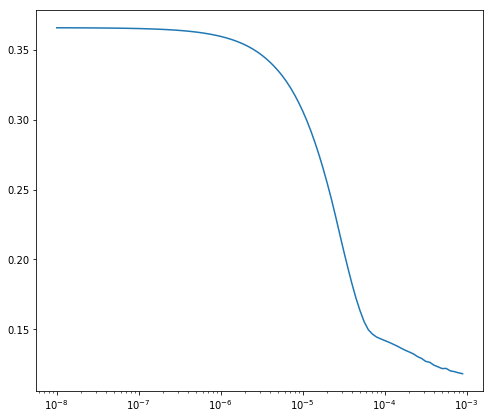

In [164]:
plot_loss(history_multi)

In [177]:
Y_hat_ew_h0_f = model_multi.predict(X_test_ew_h0)

Y_hat_ew_h0_f[:5]

array([[13288.068],
       [10583.93 ],
       [10685.57 ],
       [14716.923],
       [14561.657]], dtype=float32)

In [189]:
Y_hat_ew_h0_f[:].shape, Y_test_h0.shape

((219, 1), (219,))

In [0]:
from sklearn.metrics import mean_absolute_error

In [193]:
mean_absolute_error(Y_test_h0, Y_hat_ew_h0_f)

12422.344316317067

# Helper Functions

In [0]:
def transform_to_windows(data, load_type='actual_load'):
    """
    Input
    
    Output
    
    """
    
    #from the original datetime index create new columns with each of the year, month, day, and hour.
    data.loc[:,'year'] = data.index.year
    data.loc[:,'month'] = data.index.month
    data.loc[:,'day'] = data.index.day
    data.loc[:,'hours'] = data.index.hour
    
    #construct datetimes from the split year, month, day columns
    data.loc[:,'date'] = pd.to_datetime(data.loc[:,['year', 'month', 'day']], format='%Y-%m-%d', errors='ignore')
    
    #set the index to dates only
    data = data.set_index(pd.DatetimeIndex(data['date']))
    
    #drop non target columns 
    data = data.loc[:,[load_type, 'hours']]
    
    #pivot the table into the format Date h0, h1, ...h23
    data = data.pivot(columns='hours', values=load_type)
    
    return data

In [0]:
def shift_by_days(data, num_days):
    """
    Input a timeseries of the form 24 hourly measurements per day
    
    Output returns 
    
    """
    data_shifted = data.shift(num_days)
    
    return data_shifted
    

In [0]:
def make_shifted_features(data, shifts_list):
    
    #set the columns names on the original data set
    data = rename_cols(data, 0)
    
    #initate list of dataframes
    periods = [data]
    
    #cycle through list of shifts i.e. features
    for shift in shifts_list:
        
        #shift the data by shift value
        data_shifted = shift_by_days(data, shift)

        #update column identifers
        data_shifted = rename_cols(data_shifted, shift)
    
        periods.append(data_shifted)
        
    #concatenate all shifted datasets into one dataframe.    
    data = pd.concat(periods, axis = 1)
    
    data = trim_length(data, shifts_list)
    
    return data

In [0]:
def rename_cols(data, shift):
    
    cols = data.columns
    
    cols_list = []
    
    for idx, col in enumerate(cols):
        
        new_col = 't-' + str(shift) + ' h_' + str(idx)
        
        cols_list.append(new_col)
        
    data.columns = cols_list
    
    return data

In [0]:
def trim_length(data, shifts_list):
    
    start_point = sorted(shifts_list, reverse=True)[0]
    
    return data.iloc[start_point:,:]